In [47]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
dir = "../data"
data_files = os.listdir(dir)
thread_files = [s for s in data_files if "thread_scaling2" in s]

In [49]:
dfs = [pd.read_csv(dir + '/' + fname) for fname in thread_files]

In [50]:
def avg_time(df):
    times = df.loc[:, df.columns == "walltime"].values
    avg_time = np.mean(times)
    std_time = np.std(times)
    return (avg_time, std_time)

In [51]:
time_stats = [avg_time(df) for df in dfs]
avg_times = np.array([tup[0] for tup in time_stats])
std_times = np.array([tup[1] for tup in time_stats])

In [52]:
# Get all digits from filenames
def get_all_digits(strn):
    digit_str = []
    for ch in strn:
        if ch.isdigit():
            digit_str.append(ch)
    return ''.join(digit_str)

num_threads = np.array([int(strn.replace('thread_scaling2_', '').replace('.csv', '')) for strn in thread_files])
num_threads

array([ 8, 16,  1,  2,  4])

<ErrorbarContainer object of 3 artists>

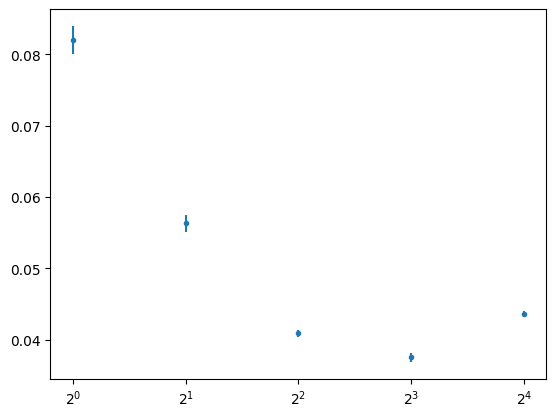

In [56]:
fig, ax = plt.subplots()
ax.set_xscale('log', base=2)
#ax.set_yscale('log', base=10)
ax.errorbar(num_threads, avg_times, yerr=std_times, \
            linestyle='', marker='.', label="Measured")